# TESTS

# Setteo GPU

- Descargar CUDA: https://developer.nvidia.com/cuda-downloads
- Descargar CDNN: https://developer.nvidia.com/cudnn
- Instalar extención C++ VSCODE
- Actualizar Drivers NVIDIA
- Revisar instalaciones de torch, ver si se tiene la versión para gpu

In [1]:
from fastai.vision.all import *
import torch

## Verificación de instalación

In [8]:
print('Versión de pyTorch:', torch.__version__)

Versión de pyTorch: 2.1.0+cpu


In [2]:
if torch.cuda.is_available():
    print("GPU detectada:", torch.cuda.get_device_name(0))
    print("Versión de CUDA:", torch.version.cuda)
    print("Versión de cuDNN:", torch.backends.cudnn.version())
else:
    print(torch.cuda.is_available(),"papito, no se detectó GPU")

GPU detectada: NVIDIA GeForce RTX 3050 Ti Laptop GPU
Versión de CUDA: 12.1
Versión de cuDNN: 90100


# Test con Ejemplo Básico de FastAi

In [ ]:
# Download the dataset
path = untar_data(URLs.PETS)

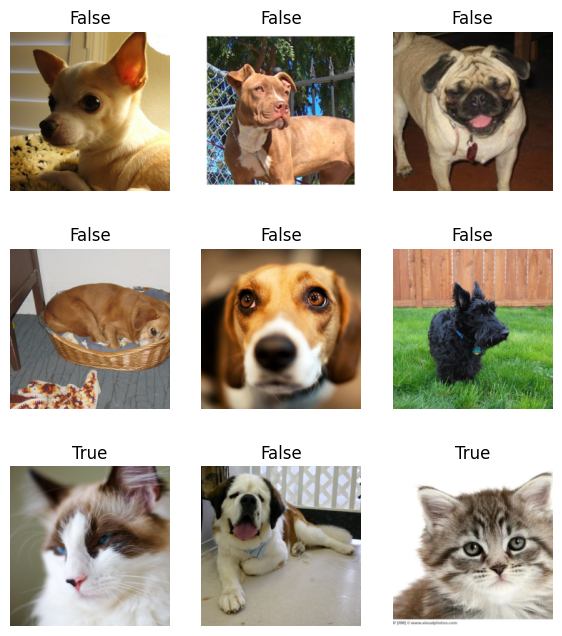

In [10]:
def label_func(f): return f[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path/"images", 
    get_image_files(path/"images"), 
    label_func, 
    item_tfms=Resize(224), 
    bs=32
)

dls.show_batch(max_n=9, figsize=(7, 8))

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(10)

c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,0.132415,0.051484,0.016915,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.047602,0.023419,0.006766,00:49
1,0.071028,0.023341,0.006766,00:49
2,0.060873,0.039192,0.012179,00:49
3,0.045305,0.036449,0.012179,00:50
4,0.030610,0.024880,0.008796,00:49
5,0.024549,0.010670,0.004060,00:50
6,0.014555,0.007119,0.002030,00:49
7,0.005412,0.006529,0.001353,00:49
8,0.004171,0.005444,0.002030,00:54
9,0.005616,0.005518,0.002030,00:50


# Testeamos si esta usando gpu

In [12]:
print(next(learn.model.parameters()).device)

cuda:0


# Testeamos

c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


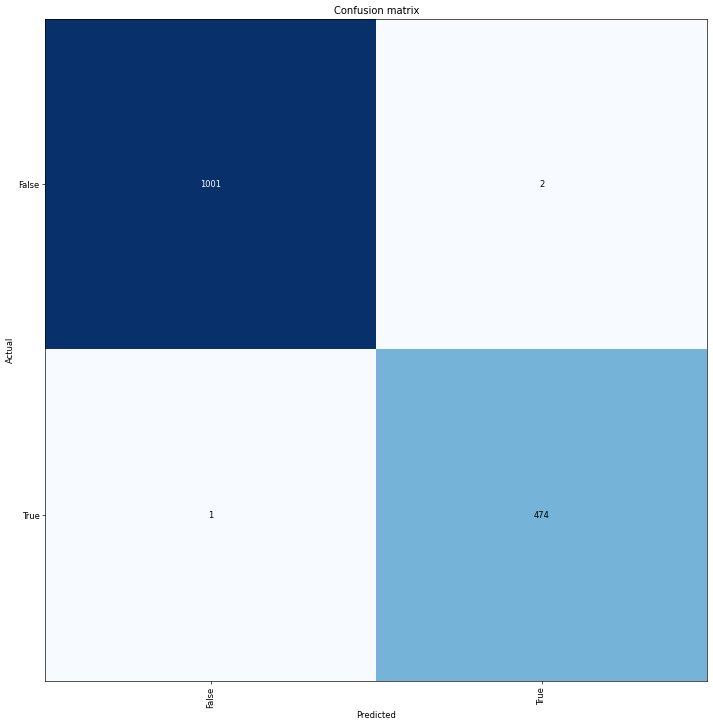

In [14]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


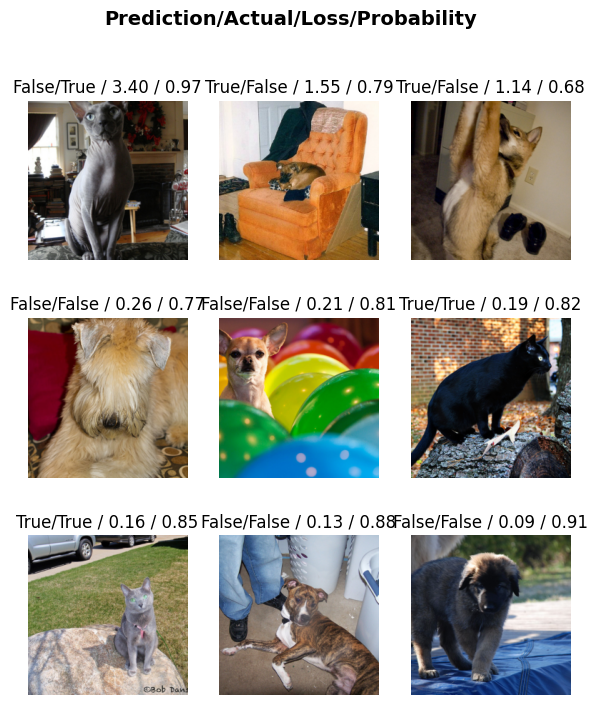

In [17]:
interp.plot_top_losses(9, figsize=(7, 8))

In [18]:
from fastai.vision.widgets import *

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


In [7]:
img = PILImage.create(get_image_files(path/"images")[0])
pred, pred_idx, probs = learn.predict(img)
print(f"Predicción: {pred}, Probabilidad: {probs[pred_idx]:.4f}")

Predicción: True, Probabilidad: 1.0000
